# Assignment 2

## Pontus Backman and Andreas Pettersson

## 1

### a)


In [1]:
import pandas as pd

df = pd.read_csv('datasets\data_assignment2.csv')
houseprices = df

#removed two houses that had a very low price compared to their living area
houseprices = houseprices[houseprices['Selling_price'] > 2500000]

houseprices

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split

x = houseprices['Living_area']
y = houseprices['Selling_price']


In [3]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [4]:
X = x[:,np.newaxis]
X.shape

(53, 1)

In [5]:
model.fit(X,y)

LinearRegression()

In [6]:
model.predict([[100]])

array([4207835.37175638])

In [7]:
model.predict([[150]])

array([5346862.79025844])

In [8]:
model.predict([[200]])

array([6485890.20876049])

In [9]:
model.coef_


array([22780.54837004])

In [10]:
model.intercept_

1929780.5347522656

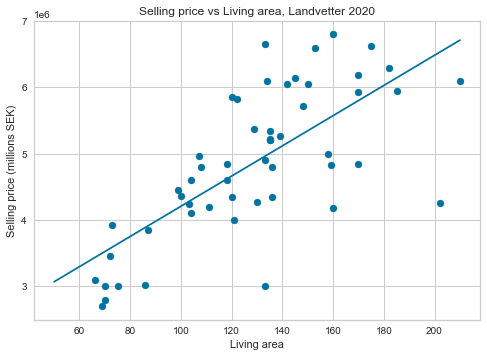

In [11]:
plt.scatter(x,y)

plt.title('Selling price vs Living area, Landvetter 2020')
plt.xlabel('Living area')
plt.ylabel('Selling price (millions SEK)')

xfit = np.linspace(50, 210, 1000)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.plot(xfit,yfit)
plt.show()

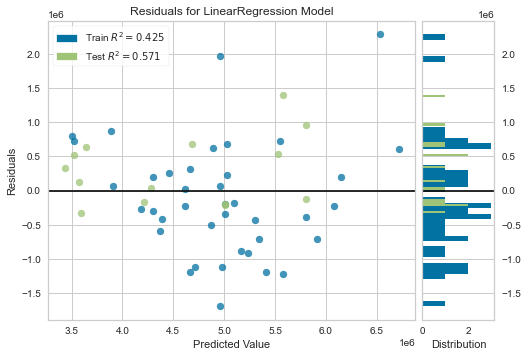

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()   